In [1]:
cd ../

/home/zulqarnain/Code/ntfa_rest/ntfa_degeneracy


In [2]:
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import glob
import os
import webdataset as wds
import nibabel as nib
import torch
import numpy as np

In [3]:
mask_dir = '/data/zulqarnain/fmri_data/aging_data_fmriprep/'
def mask_filename(sub, ses):
    return (mask_dir + f"sub-{sub:03}/ses-{ses:01}/func/sub-{sub:03}_ses-{ses:01}_task-rest" \
            "_space-MNI152NLin6Asym_res-2_desc-brain_mask.nii.gz")

In [4]:
mask='/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-154/ses-1/func/sub-154_ses-1_task-rest_' \
                                            'space-MNI152NLin6Asym_res-2_desc-brain_mask.nii.gz'
mask_img = nib.load(mask)

In [5]:
# nmsk = len(utils.sorted_glob(mask_dir + f'*/func/*space-MNI152NLin6Asym*brain_mask.nii.gz'))
for i in utils.sorted_glob(mask_dir + f'*/anat/*_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz'):
    print(i)
    print(nib.load(i).get_fdata().shape)
total_mask = np.stack([nib.load(i).get_fdata() > 0.5 for i in \
                             utils.sorted_glob(mask_dir + f'*/anat/*_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz')])


/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-154/anat/sub-154_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz
(91, 109, 91)
/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-163/anat/sub-163_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz
(91, 109, 91)
/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-197/anat/sub-197_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz
(91, 109, 91)
/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-220/anat/sub-220_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz
(91, 109, 91)
/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-276/anat/sub-276_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz
(91, 109, 91)
/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-280/anat/sub-280_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz
(91, 109, 91)


In [6]:
total_mask.shape

(6, 91, 109, 91)

In [7]:
squashed_mask = np.sum(total_mask,axis=0)

In [8]:
squashed_mask.shape

(91, 109, 91)

In [9]:
thresh_mask = np.zeros(squashed_mask.shape)
thresh_mask[squashed_mask > .90*total_mask.shape[0]] = 1

In [10]:
np.sum(thresh_mask)

10521.0

In [11]:
91*109*91

902629

In [12]:
thresh_mask_img = nib.Nifti1Image(thresh_mask, mask_img.affine, mask_img.header)
nib.save(thresh_mask_img, mask_dir + 'masks/' + 'sub-6-MNI152NLin6Asym_res-2_desc-brain_mask_90_thresh_GM.nii.gz')

In [13]:
msk = nib.load(mask_dir + 'masks/' + 'sub-6-MNI152NLin6Asym_res-2_desc-brain_mask_90_thresh_GM.nii.gz')

In [14]:
np.sum(msk.get_fdata())

10521.000622201245

In [15]:
msk2 = nib.load('/data/zulqarnain/fmri_data/gm_mask_icbm152_brain.nii.gz')
np.sum(msk2.get_fdata())

191002.0

In [19]:
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('pdf', 'svg')

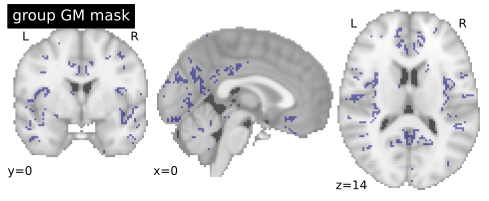

In [20]:
plotting.plot_roi(msk, draw_cross=False, title="group GM mask")
plt.show()